# Приоритизизация гипотез и анализ A/B-теста

### Описание проекта

Задание:

- Для крупного интернет магазина совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки. 

Необходимо:

- Приоритизировать гипотезы, чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса. 
- Провести A/B-тест, чтобы точно измерить эффект от внедрения изменения.
- Проанализировать результат. 



#### Приоритизация гипотез

1. [Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.](#ICE)
2. [Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.](#RICE)
3. [Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE.](#ICE_RICE)


#### Анализ A/B теста

1. [Построим график кумулятивной выручки по группам.](#cum) 
2. [Построим график кумулятивного среднего чека по группам.](#mean_check)
3. [Построим график относительного изменения кумулятивного среднего чека группы B к группе A.](#B/A_mean_check)
4. [Построим график кумулятивной конверсии по группам.](#conversion)
5. [Построим график относительного изменения кумулятивной конверсии группы B к группе A.](#B/A_conversion)
6. [Построим точечный график количества заказов по пользователям.](#scatter_plot_users)
7. [Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.](#percentile_orders)
8. [Построим точечный график стоимостей заказов.](#plot_revenue)
9. [Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.](#pecentile_revenue)
10. [Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.](#conversion_raw)
11. [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.](#mean_check_row)
12. [Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.](#conversion_cleared)
13. [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#mean_check_cleared) 
14. [Примем решение по результатам теста.](#decision)

##### [Выводы](#output)



# Часть 1. Приоритизация гипотез.

Вызовем необходимые библиотеки 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st


Прочитаем файл с данными и сохраним в переменную hypotheses.

In [2]:
hypotheses = pd.read_csv('/datasets/hypothesis.csv') 

In [3]:
def analysis(date):
    """
    функция показывает ифнормацию о таблице
   
    """
    date.info()
    date.columns = date.columns.str.lower() # переведем названия столбцов в нижний регистр
    display(date.describe(include = [np.number])) # просмотр числового описания данных с помощью метода .describe(), результат только для цифровых столбцов
    display(date.describe(include = [np.object])) # просмотр описания столбцов со строковыми данными
    display(date.head()) # просмотр первых 5 строк
    display(date.isnull().sum()) # просмотр нулевых значений с помощью метода isnull()
    display(date.duplicated().sum())# получили суммарное кол-во дубликатов в таблице
    date.head()

In [4]:
analysis(hypotheses)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,reach,impact,confidence,efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


,hypothesis
count,9
unique,9
top,Добавить блоки рекомендаций товаров на сайт ин...
freq,1


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

0

<a id="ICE"></a>
### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета



Посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице. Новый столбец назовем ICE. 
Выведим столбцы 'hypothesis' и 'ICE', отсортированные по столбцу 'ICE'.

In [5]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'])/hypotheses['efforts']
print((hypotheses[['hypothesis', 'ICE']]).sort_values(by='ICE', ascending=False))
hypotheses = pd.set_option('display.max_colwidth', -1)

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы по ICE 8, 0, 7, 6

<a id="RICE"></a>
### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице. Новый столбец назовем RICE. 
Выведим из получившейся таблицы столбцы 'hypothesis' и 'RICE', отсортированные по столбцу 'RICE'.

In [6]:
hypotheses = pd.read_csv('/datasets/hypothesis.csv') 
hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Efforts']
print((hypotheses[['Hypothesis', 'RICE']]).sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

<a id="ICE_RICE"></a>

### Вывод
Наиболее перспективные гипотезы по RICE 7, 2, 0, 6 (ICE 8, 0, 7, 6) (посмотреть на параметр Reach)
Наиболее перспективными гипотезами остаются также 7, 6 и 0, но на певром месте уже гипотеза под номером 7 и появилась гипотеза под номером 2. Это произошло, так как параметр reach у этих гипотез самый высокий. Эти изменения затронут максимальное количество пользователей.


# Часть 2. Анализ A/B-теста

### Проанализируем A/B-тест:

Прочитаем данные и запишем в переменные.

In [8]:
orders = pd.read_csv('/datasets/orders.csv') 
visitors = pd.read_csv('/datasets/visitors.csv')

Подготовим данные для их дальнейшего анализа 

In [44]:
 
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d') 
# перевели столбец с датой в нужный формат с помощью метода to_datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [45]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d') 
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData 

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах:

Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.
Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group'.

In [12]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [13]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

Объединим обе таблицы в одной

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<a id="cum"></a>
#### Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

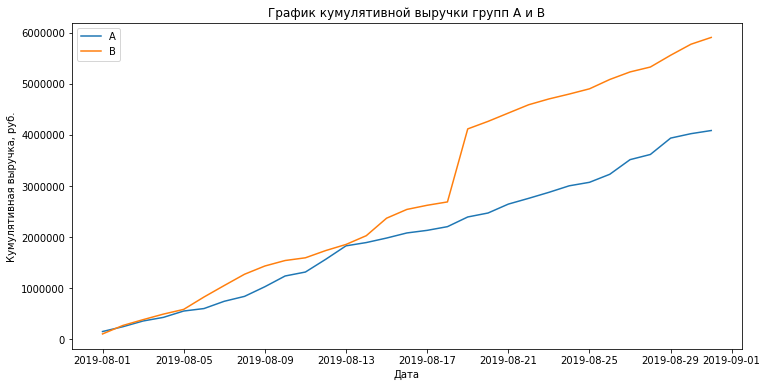

In [46]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка, руб.")


plt.title('График кумулятивной выручки групп А и В')



import warnings  
warnings.filterwarnings("ignore")  

##### Вывод:
Выручка почти равномерно увеличивается в течение всего теста.
Однако график выручки группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.


<a id="mean_check"></a>
#### Построим графики среднего чека по группам

Разделим кумулятивную выручку на кумулятивное число заказов:

Text(0.5, 1.0, 'Cредний чек по группам')

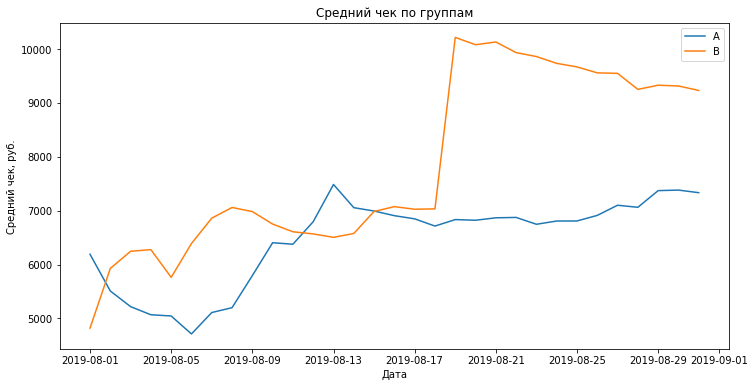

In [16]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()

plt.xlabel("Дата")
plt.ylabel("Средний чек, руб.")


plt.title('Cредний чек по группам')


##### Вывод: 
Средний чек становится равномерным ближе к концу теста для группы А, у группы В 18 августа 2019 года произошел резкий скачок среднего чека, на который могли повлиять аномальные значения, и затем средний чек начинает уменьшаться.


<a id="B/A_mean_check"></a>
#### Построим график относительного различия для среднего чека.

Text(0.5, 1.0, 'Относительное различие для среднего чека')

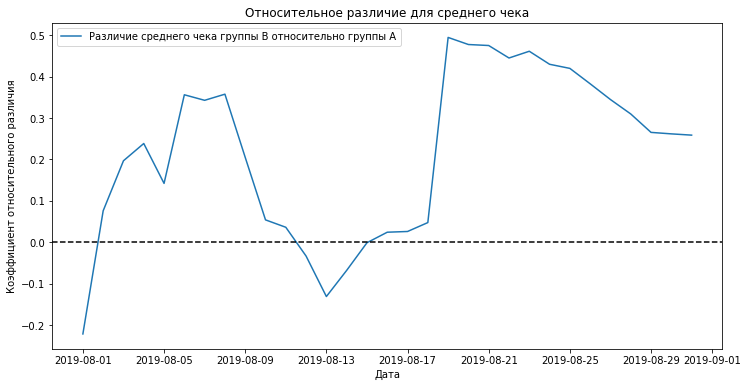

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Различие среднего чека группы B относительно группы A")

# добавим горизонтальную ось методом axhline()
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Дата")
plt.ylabel("Коэффициент относительного различия")
plt.legend()

plt.title('Относительное различие для среднего чека')

##### Вывод:
В нескольких точках график различия между сегментами резко «скачет», что говорит о том, что есть крупные заказы и выбросы.

<a id="conversion"></a>
#### Аналогично проанализируем график кумулятивной конверсии. 

Text(0.5, 1.0, 'Кумулятивная конверсия')

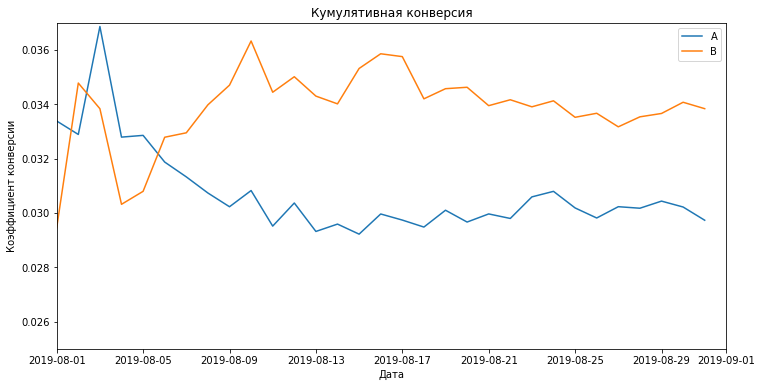

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel("Дата")
plt.ylabel("Коэффициент конверсии")

plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.037])

plt.title('Кумулятивная конверсия')

##### Вывод:
Колебания групп происходят примерно одинаково, но конверсия группы В выше практически с самого начала времени.

<a id="B/A_conversion"></a>
Построим график относительного различия кумулятивных конверсий:

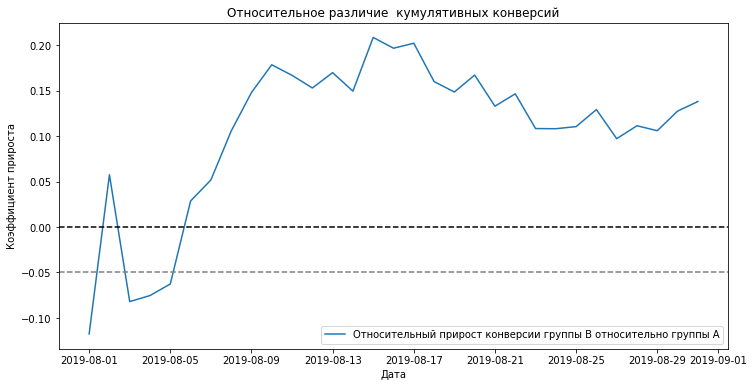

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel("Дата")
plt.ylabel("Коэффициент прироста")
plt.title('Относительное различие  кумулятивных конверсий')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.05, color='grey', linestyle='--')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

##### Вывод:
В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и снова начала падать, но в скором времени резко стала расти и остается больше конверсии группы А.
В целом отношение конверсии установилось, но чтобы сделать выводы, нужно проанализировать аномалии, возможно, они изменят картину.

<a id="scatter_plot_users"></a>
#### Построим точечный график количества заказов по пользователям. 

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [20]:


ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

       visitorId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


Построим гистрограмму распределения количества заказов на одного пользователя.

Text(0.5, 0, 'Кол-во заказов')

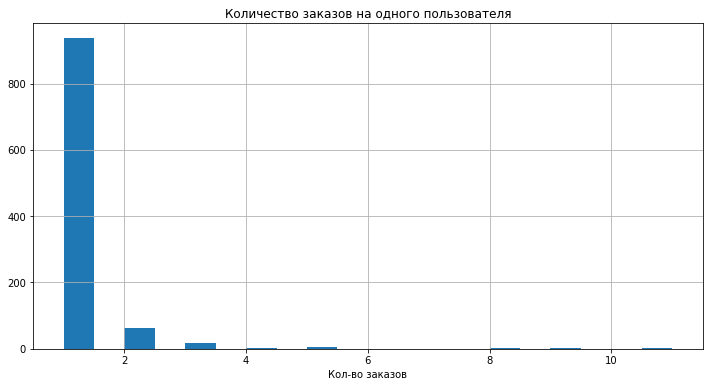

In [21]:

ordersByUsers['orders'].hist(bins=20, figsize=(12,6))


plt.title('Количество заказов на одного пользователя')
plt.xlabel('Кол-во заказов')



Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя:

Text(0.5, 1.0, 'Количество заказов на одного пользователя')

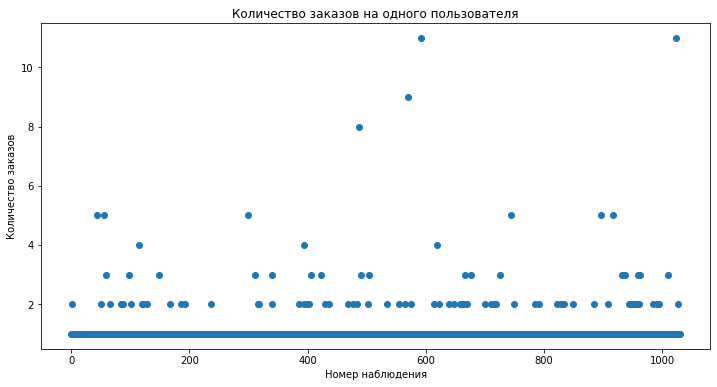

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,6))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel("Номер наблюдения")
plt.ylabel("Количество заказов")
plt.title('Количество заказов на одного пользователя')

##### Вывод:
Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.


<a id="percentile_orders"></a>
Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [23]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))


[1. 2. 4.]


##### Вывод: 
Не более 5% пользователей оформляли больше чем 2  заказов. И 10% пользователей заказывали более одного раза.
Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеим аномальных пользователей по ней. 

<a id="plot_revenue"></a>
Изучим гистограмму распределения стоимостей заказов:

Text(0.5, 1.0, 'Стоимость заказа на одного пользователя, руб.')

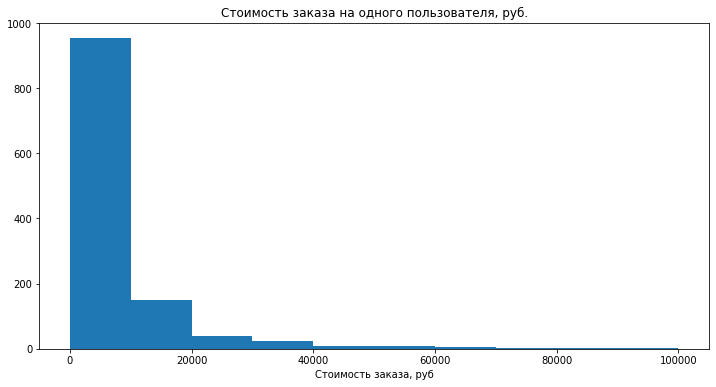

In [24]:
#n_bins = len(orders['revenue'])
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,6))
plt.hist(orders['revenue'], range=[0, 100000])
plt.xlabel('Стоимость заказа, руб')

plt.title('Стоимость заказа на одного пользователя, руб.')



#axs[0].hist(data['sepal length (cm)'], bins=n_bins)

В данных явно есть заказы дороже 20 000 — например, около 60 000, 80 000 и 90 000 рублей. Однако большинство всё-таки имеет меньшую выручку.
Оценим стоимость заказов ещё одним способом:

Text(0.5, 1.0, 'Стоимость заказа на одного пользователя, руб.')

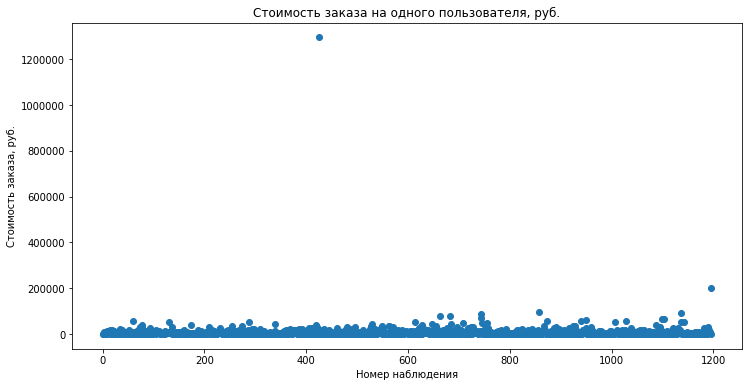

In [25]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.xlabel("Номер наблюдения")
plt.ylabel("Стоимость заказа, руб.")
plt.title('Стоимость заказа на одного пользователя, руб.')




Есть единичные дорогие заказы. По графику сложно выбрать границу аномальных заказов. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

<a id="pecentile_revenue"></a>
Определим 90, 95 и 99 перцентили среднего чека в выборке:

In [26]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


##### Вывод:
Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей.

Выберем уровень в качестве аномального заказы больше 28 000 рублей и с количествои заказов больше 2, так как на такю сумму и в таком количестве покупают не более 5%.


<a id="conversion_raw"></a>
#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

Создадим датафрейм с количеством пользователей в выбранную дату в группе A

In [27]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


Получим строки таблицы visitorsADaily. Агрегируем значения. Вычислим максимальную дату. Найдем сумму кол-ва пользователей в выбранную дату в группе А

In [28]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


Создадим датафрейм с количеством пользователей в выбранную дату в группе В

In [29]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Получим строки таблицы visitorsADaily. Агрегируем значения. Вычислим максимальную дату. Найдем сумму кол-ва пользователей в выбранную дату в группе В

In [30]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Создаем датафрейм с датой, идентификатором заказа и пользователя совершившего заказ в группе А. Группируем данные по дате, агрегируем значения, находим число уникальных ID заказов, подсчитываем сумму выручки заказов.

In [31]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

Соберём агрегированные кумулятивные данные:

Получим строки таблицы ordersADaily, дата которых меньше или равна дате элемента из ordersADaily.

Агрегируем значения. Вычислим максимальную дату. Найдем сумму количества заказов в выбранную дату в группе и суммарную выручку в выбранную дату в группе. Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date'


In [32]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

Аналогичные действия проведем для группы В

In [33]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [34]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


Объединим все таблицы

In [35]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Названия столбцов данных:

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

<a id=""></a>
Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [37]:

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
#  последовательности объединили функцией pd.concat(). Список индексов создали функцией np.arange(), объединили по строкам
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.
Число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [38]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


##### Вывод: 
По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.
Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

<a id="mean_check_row"></a>
#### Найдём относительные различия в среднем чеке между группами:



In [39]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное различие  среднего чека между "сырыми" сегментами равно 0.259. 
Найденные ранее 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 37 500 рублей.  Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 37 500 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

Узнаем, сколько всего аномальных пользователей методом shape().

In [40]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
(68,)


<a id="conversion_cleared"></a>
Всего 68 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [41]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [42]:
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.006
0.204


##### Вывод: 
Относительный выигрыш группы B стал равен 20.4%, статистически значимое различие между группами осталось.

<a id="mean_check_cleared"></a>
#### Посмотрим, произошло ли что-нибудь с результатами по среднему чеку:

In [43]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.394
-0.017


##### Вывод: 
P-value немного увеличился, но  разница между сегментами сократилась, группа В стала немного прогирывать группе А.
Хотя общие выводы по результатам теста не изменились, видно, как  аномалии могут влиять на результаты A/B-теста

<a id="decision"></a>
#### Принятие решения 
Имеющиеся факты:
Есть статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий;
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

Исходя из обнаруженных фактов, тест следует остановить, зафиксировать отсутствие различий между группами.

<a id="output"></a>
### Выводы

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты, для этого:

1. Приоритезировали гипотезы:

Наиболее перспективными гипотезами по RICE оказались 7, 2, 0, 6 по ICE -  8, 0, 7, 6.
Наиболее перспективными гипотезами остаются также 7, 6 и 0, но на певром месте уже гипотеза под номером 7 и появилась гипотеза под номером 2. Это произошло из-за параметра reach, так как у гипотез 7 и 2 он самый высокий. Эти изменения (указанные в гипотезах) затронут максимальное количество пользователей.


2. Проанализировали A/B-тест:

95% пользователей совершают 1 или 2 заказа и 95% пользователей совершают заказ меньше, чем на 28 000 рублей.

По «сырым» данным различия в конверсии групп A и B есть. Относительный выигрыш группы B равен 13.8%. После удаления аномальных значений конверсия группы В увеличилась на 6.6%, статистчиески значимое различие осталось. Но различия в среднем чеке групп A и B нет ни по «сырым» данным, ни после удаления аномалий, поэтому тест следует остановить, зафиксировать отсутствие различий между группами. Возможно тест стоит провести в другое время или на большем числе тестируемых.

